### The goal is to predict the car model or body style that a person is likely to choose based on their gender, annual income, the car's type, engine, and price range

### 1. Get data

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

import warnings
warnings.filterwarnings('ignore')

filepath = '../data/car_sales.csv'

car = pd.read_csv(filepath)
car.head()

,Car_id,Date,Customer Name,Gender,Annual Income,Dealer_Name,Company,Model,Engine,Transmission,Color,Price ($),Dealer_No,Body Style,Phone,Dealer_Region
0,C_CND_000001,1/2/2022,Geraldine,Male,13500,Buddy Storbeck's Diesel Service Inc,Ford,Expedition,DoubleÂ Overhead Camshaft,Auto,Black,26000,06457-3834,SUV,8264678,Middletown
1,C_CND_000002,1/2/2022,Gia,Male,1480000,C & M Motors Inc,Dodge,Durango,DoubleÂ Overhead Camshaft,Auto,Black,19000,60504-7114,SUV,6848189,Aurora
2,C_CND_000003,1/2/2022,Gianna,Male,1035000,Capitol KIA,Cadillac,Eldorado,Overhead Camshaft,Manual,Red,31500,38701-8047,Passenger,7298798,Greenville
3,C_CND_000004,1/2/2022,Giselle,Male,13500,Chrysler of Tri-Cities,Toyota,Celica,Overhead Camshaft,Manual,Pale White,14000,99301-3882,SUV,6257557,Pasco
4,C_CND_000005,1/2/2022,Grace,Male,1465000,Chrysler Plymouth,Acura,TL,DoubleÂ Overhead Camshaft,Auto,Red,24500,53546-9427,Hatchback,7081483,Janesville



### 2. Explore data

2.1 Datasets information and types

In [2]:
car.describe()


,Annual Income,Price ($),Phone
count,2.390600e+04,23906.000000,2.390600e+04
mean,8.308403e+05,28090.247846,7.497741e+06
std,7.200064e+05,14788.687608,8.674920e+05
min,1.008000e+04,1200.000000,6.000101e+06
25%,3.860000e+05,18001.000000,6.746495e+06
50%,7.350000e+05,23000.000000,7.496198e+06
75%,1.175750e+06,34000.000000,8.248146e+06
max,1.120000e+07,85800.000000,8.999579e+06


In [3]:
car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23906 entries, 0 to 23905
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Car_id         23906 non-null  object
 1   Date           23906 non-null  object
 2   Customer Name  23905 non-null  object
 3   Gender         23906 non-null  object
 4   Annual Income  23906 non-null  int64 
 5   Dealer_Name    23906 non-null  object
 6   Company        23906 non-null  object
 7   Model          23906 non-null  object
 8   Engine         23906 non-null  object
 9   Transmission   23906 non-null  object
 10  Color          23906 non-null  object
 11  Price ($)      23906 non-null  int64 
 12  Dealer_No      23906 non-null  object
 13  Body Style     23906 non-null  object
 14  Phone          23906 non-null  int64 
 15  Dealer_Region  23906 non-null  object
dtypes: int64(3), object(13)
memory usage: 2.9+ MB


2.2 Clean Columns

In [4]:
car.columns

Index(['Car_id', 'Date', 'Customer Name', 'Gender', 'Annual Income',
       'Dealer_Name', 'Company', 'Model', 'Engine', 'Transmission', 'Color',
       'Price ($)', 'Dealer_No ', 'Body Style', 'Phone', 'Dealer_Region'],
      dtype='object')

In [5]:
car.columns = car.columns.str.replace(' ', '_')

In [6]:
car = car.drop(['Phone','Car_id', 'Customer_Name', 'Dealer_Name', 'Engine', 'Dealer_No_'], axis=1)

car.head()

,Date,Gender,Annual_Income,Company,Model,Transmission,Color,Price_($),Body_Style,Dealer_Region
0,1/2/2022,Male,13500,Ford,Expedition,Auto,Black,26000,SUV,Middletown
1,1/2/2022,Male,1480000,Dodge,Durango,Auto,Black,19000,SUV,Aurora
2,1/2/2022,Male,1035000,Cadillac,Eldorado,Manual,Red,31500,Passenger,Greenville
3,1/2/2022,Male,13500,Toyota,Celica,Manual,Pale White,14000,SUV,Pasco
4,1/2/2022,Male,1465000,Acura,TL,Auto,Red,24500,Hatchback,Janesville


2.3 Data Exploration

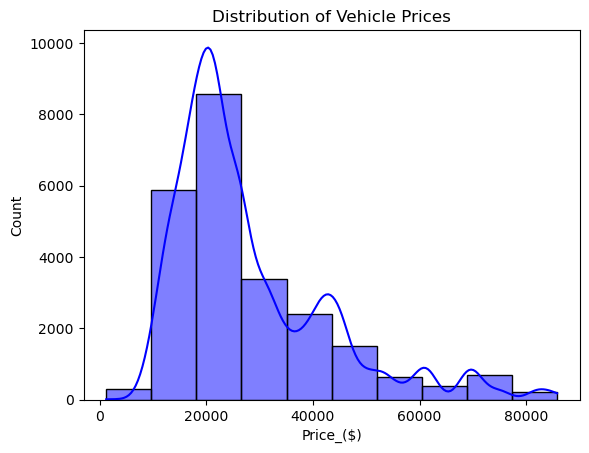

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(data=car, x='Price_($)', bins=10, kde=True, color='blue')
plt.title('Distribution of Vehicle Prices')
plt.show()

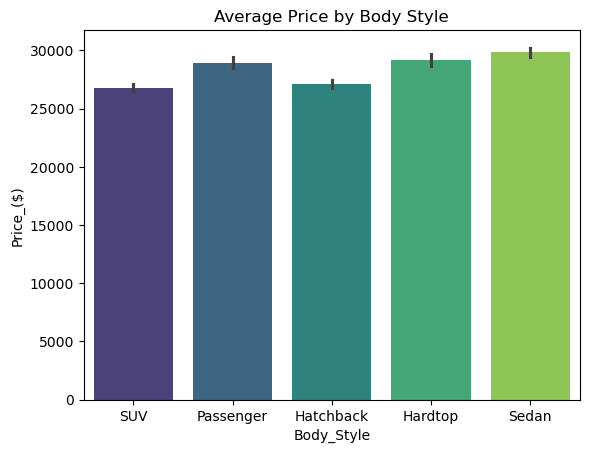

In [8]:
sns.barplot(data=car, x='Body_Style', y='Price_($)', palette='viridis')
plt.title('Average Price by Body Style')
plt.show()

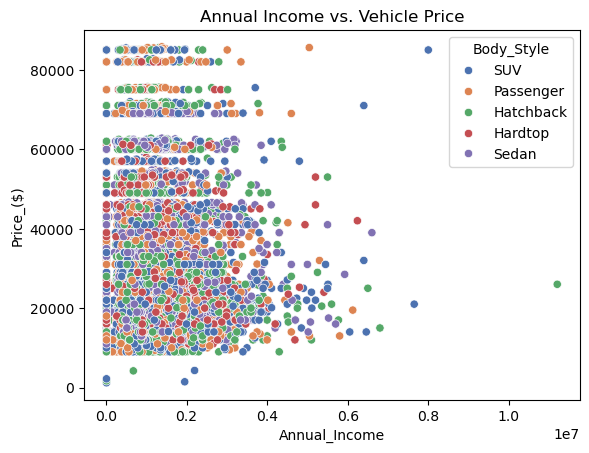

In [9]:
sns.scatterplot(data=car, x='Annual_Income', y='Price_($)', hue='Body_Style', palette='deep')
plt.title('Annual Income vs. Vehicle Price')
plt.show()

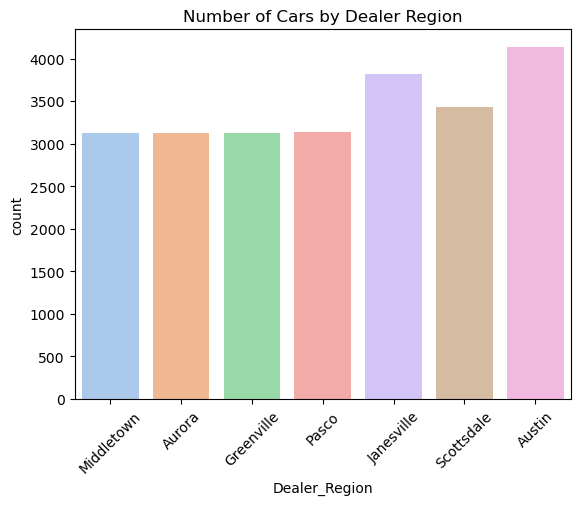

In [10]:
sns.countplot(data=car, x='Dealer_Region', palette='pastel')
plt.title('Number of Cars by Dealer Region')
plt.xticks(rotation=45)
plt.show()

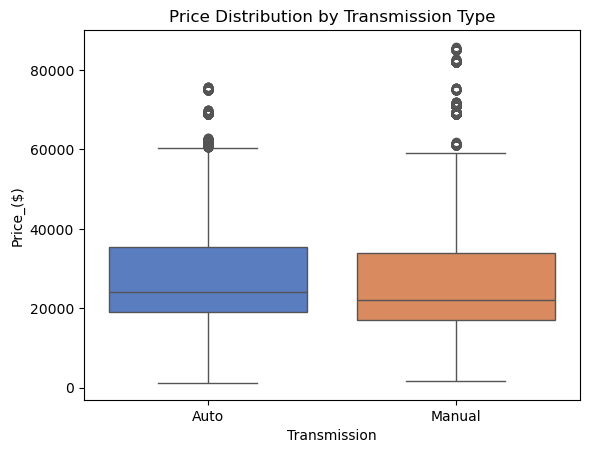

In [11]:
sns.boxplot(data=car, x='Transmission', y='Price_($)', palette='muted')
plt.title('Price Distribution by Transmission Type')
plt.show()

<Figure size 1200x600 with 0 Axes>

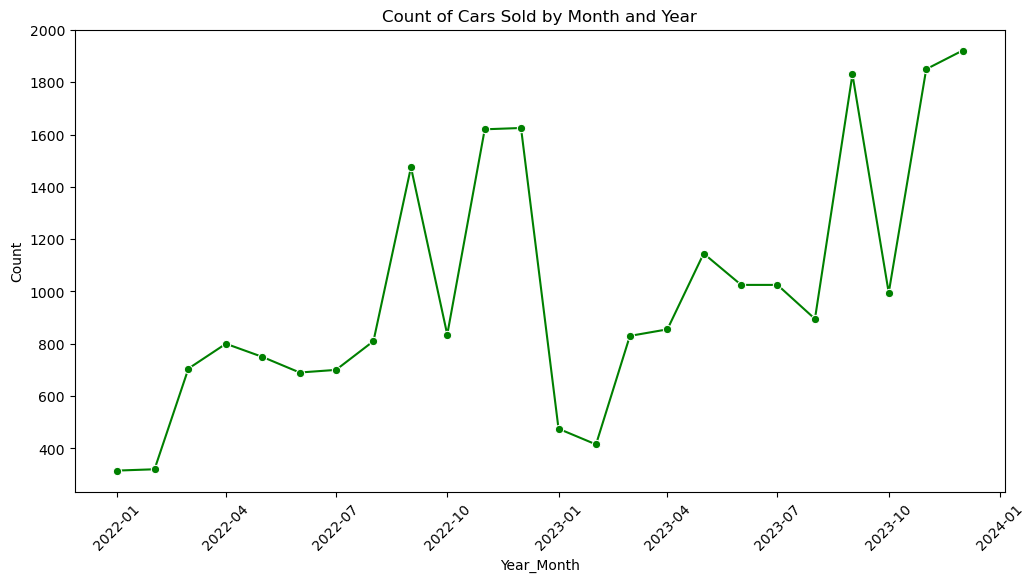

In [12]:
# Set figure size
plt.figure(figsize=(12, 6))

# Convert the 'Date' column to datetime
car['Date'] = pd.to_datetime(car['Date'])

# Group by Year and Month
car['Year_Month'] = car['Date'].dt.to_period('M')  # Extract Year and Month

# Group by the new 'Year_Month' column
df_grouped = car.groupby('Year_Month').size().reset_index(name='Count')

# Convert 'Year_Month' back to datetime for plotting
df_grouped['Year_Month'] = df_grouped['Year_Month'].dt.to_timestamp()

# Plot
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_grouped, x='Year_Month', y='Count', marker='o', color='green')
plt.title('Count of Cars Sold by Month and Year')
plt.xticks(rotation=45)
plt.show()

In [13]:
car = car.drop(['Date', 'Year_Month', 'Model'], axis=1)
car

,Gender,Annual_Income,Company,Transmission,Color,Price_($),Body_Style,Dealer_Region
0,Male,13500,Ford,Auto,Black,26000,SUV,Middletown
1,Male,1480000,Dodge,Auto,Black,19000,SUV,Aurora
2,Male,1035000,Cadillac,Manual,Red,31500,Passenger,Greenville
3,Male,13500,Toyota,Manual,Pale White,14000,SUV,Pasco
4,Male,1465000,Acura,Auto,Red,24500,Hatchback,Janesville
...,...,...,...,...,...,...,...,...
23901,Male,13500,Plymouth,Manual,Red,12000,Passenger,Pasco
23902,Female,900000,Chevrolet,Auto,Black,16000,Hardtop,Middletown
23903,Male,705000,BMW,Manual,Red,21000,Sedan,Scottsdale
23904,Male,13500,Chevrolet,Auto,Black,31000,Passenger,Austin


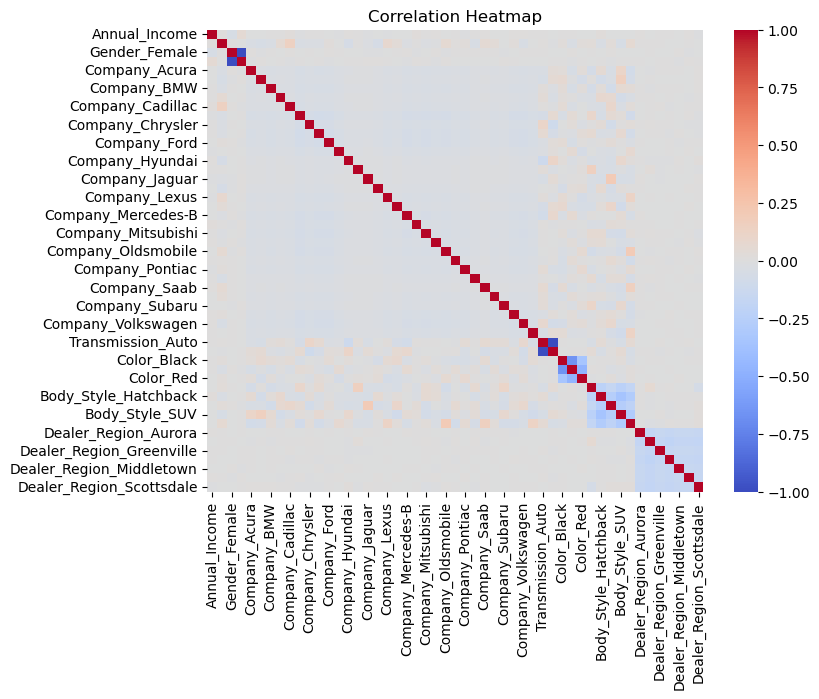

In [14]:
corr = pd.get_dummies(car)

# Compute correlation matrix
correlation_matrix = corr.corr()

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

### 3. Data Preprocessing

In [15]:
# Define features and target variable
X = car.drop('Body_Style', axis=1)
y = car['Body_Style']

# Preprocessing pipeline: One-hot encode categorical columns
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(), ['Gender', 'Company', 'Transmission', 'Color', 'Dealer_Region']),
        ('num', StandardScaler(), ['Annual_Income', 'Price_($)'])  # Keep numerical columns as is
    ])

# Create a pipeline that first preprocesses the data, then applies the classifier
pipeline0 = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(n_estimators=100, random_state=42))
])

# Create a pipeline that first preprocesses the data, then applies the classifier
pipeline1 = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', SVC(random_state=42))
])


# Create another pipeline with a different classifier
pipeline2 = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', KNeighborsClassifier())
])


# Create a pipeline that first preprocesses the data, then applies the XGBoost classifier
pipeline3 = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', XGBClassifier(random_state=42))
])

In [16]:
pipeline0

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat', OneHotEncoder(),
                                                  ['Gender', 'Company',
                                                   'Transmission', 'Color',
                                                   'Dealer_Region']),
                                                 ('num', StandardScaler(),
                                                  ['Annual_Income',
                                                   'Price_($)'])])),
                ('classifier', RandomForestClassifier(random_state=42))])

In [17]:
pipeline1

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat', OneHotEncoder(),
                                                  ['Gender', 'Company',
                                                   'Transmission', 'Color',
                                                   'Dealer_Region']),
                                                 ('num', StandardScaler(),
                                                  ['Annual_Income',
                                                   'Price_($)'])])),
                ('classifier', SVC(random_state=42))])

In [18]:
pipeline2

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat', OneHotEncoder(),
                                                  ['Gender', 'Company',
                                                   'Transmission', 'Color',
                                                   'Dealer_Region']),
                                                 ('num', StandardScaler(),
                                                  ['Annual_Income',
                                                   'Price_($)'])])),
                ('classifier', KNeighborsClassifier())])

In [19]:
pipeline3

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat', OneHotEncoder(),
                                                  ['Gender', 'Company',
                                                   'Transmission', 'Color',
                                                   'Dealer_Region']),
                                                 ('num', StandardScaler(),
                                                  ['Annual_Income',
                                                   'Price_($)'])])),
                ('classifier',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None, colsample_bynode=None,
                               colsample_bytree=None, devic...
                               feature_types=None, gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=None, n_jobs=None,
                               num_parallel_tree=None, random_state=42, ...))])

### 4. Split data to train and test sets

In [20]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) # 80% train set and 20% test set

In [21]:
X_train.shape
X_test.shape
y_train.shape
y_test.shape

(4782,)

### 5. Model Training & Results

In [22]:
# Train the model
pipeline0.fit(X_train, y_train)

# Predictions
y_pred = pipeline0.predict(X_test)

# Store Metrics
report_dict0 = classification_report(y_test, y_pred, output_dict=True)
accuracy0 = accuracy_score(y_test, y_pred)

# Extract metrics for the bar chart
metrics = ["Accuracy", "Precision", "Recall", "F1-Score"]
values0 = [
    accuracy0,                           # Accuracy
    report_dict0['weighted avg']['precision'],  # weighted avg Precision
    report_dict0['weighted avg']['recall'],     # weighted avg Recall
    report_dict0['weighted avg']['f1-score']    # weighted avg F1-Score
]


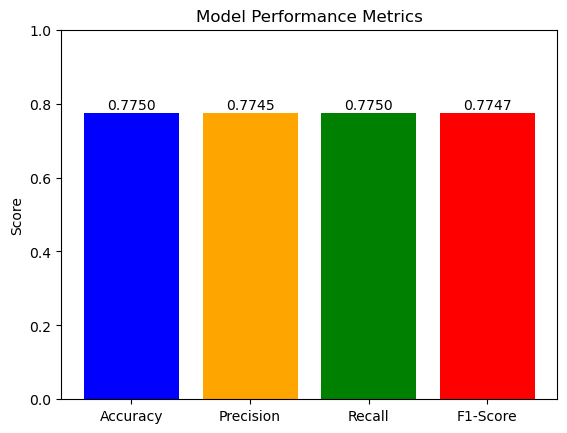

In [23]:
# Plot to evaluate performance
plt.bar(metrics, values0, color=["blue", "orange", "green", "red"])
for i, value in enumerate(values0):
    plt.text(i, value + 0.01, f"{value:.4f}", ha="center")
plt.title("Model Performance Metrics")
plt.ylabel("Score")
plt.ylim(0, 1)  # Metrics range from 0 to 1
plt.show()

In [24]:
# Train the model
pipeline1.fit(X_train, y_train)

# Predictions
y_pred = pipeline1.predict(X_test)

# Store Metrics
report_dict1 = classification_report(y_test, y_pred, output_dict=True)
accuracy1 = accuracy_score(y_test, y_pred)

# Extract metrics for the bar chart
metrics = ["Accuracy", "Precision", "Recall", "F1-Score"]
values1 = [
    accuracy1,                           # Accuracy
    report_dict1['weighted avg']['precision'],  # weighted avg Precision
    report_dict1['weighted avg']['recall'],     # weighted avg Recall
    report_dict1['weighted avg']['f1-score']    # weighted avg F1-Score
]

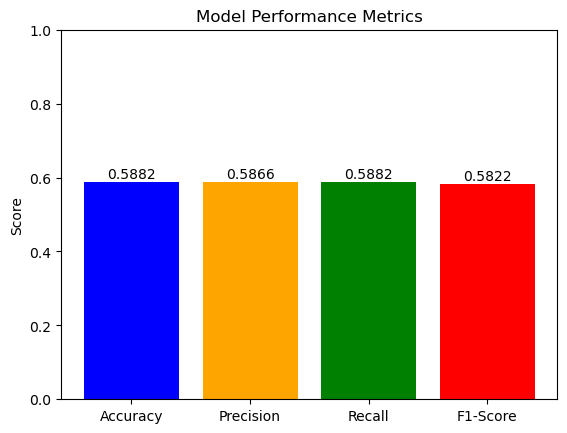

In [25]:
# Plot to evaluate performance
plt.bar(metrics, values1, color=["blue", "orange", "green", "red"])
for i, value in enumerate(values1):
    plt.text(i, value + 0.01, f"{value:.4f}", ha="center")
plt.title("Model Performance Metrics")
plt.ylabel("Score")
plt.ylim(0, 1)  
plt.show()

In [26]:
# Train the model
pipeline2.fit(X_train, y_train)

# Predictions
y_pred = pipeline2.predict(X_test)

# Store Metrics
report_dict2 = classification_report(y_test, y_pred, output_dict=True)
accuracy2 = accuracy_score(y_test, y_pred)

# Extract metrics for the bar chart
metrics = ["Accuracy", "Precision", "Recall", "F1-Score"]
values2 = [
    accuracy2,                           # Accuracy
    report_dict2['weighted avg']['precision'],  # weighted avg Precision
    report_dict2['weighted avg']['recall'],     # weighted avg Recall
    report_dict2['weighted avg']['f1-score']    # weighted avg F1-Score
]

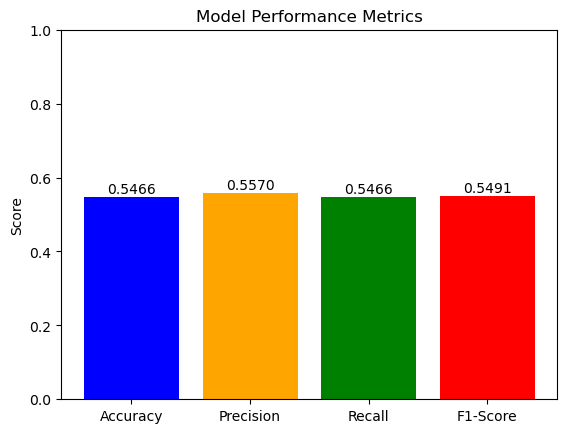

In [27]:
# Plot to evaluate performance
plt.bar(metrics, values2, color=["blue", "orange", "green", "red"])
for i, value in enumerate(values2):
    plt.text(i, value + 0.01, f"{value:.4f}", ha="center")
plt.title("Model Performance Metrics")
plt.ylabel("Score")
plt.ylim(0, 1)  
plt.show()

In [28]:
from sklearn.preprocessing import LabelEncoder
# Fit and transform y
label_encoder = LabelEncoder()
yOne = label_encoder.fit_transform(y)

# Get the corresponding labels
labels = label_encoder.classes_
print(labels)

X_train, X_test, y_train, y_test = train_test_split(X, yOne, test_size=0.2, random_state=42) # 80% train set and 20% test set

['Hardtop' 'Hatchback' 'Passenger' 'SUV' 'Sedan']


In [29]:
# Train the model
pipeline3.fit(X_train, y_train)

# Predictions
y_pred = pipeline3.predict(X_test)

# Store Metrics
report_dict3 = classification_report(y_test, y_pred, output_dict=True)
accuracy3 = accuracy_score(y_test, y_pred)

# Extract metrics for the bar chart
metrics = ["Accuracy", "Precision", "Recall", "F1-Score"]
values3 = [
    accuracy3,                           # Accuracy
    report_dict3['weighted avg']['precision'],  # weighted avg Precision
    report_dict3['weighted avg']['recall'],     # weighted avg Recall
    report_dict3['weighted avg']['f1-score']    # weighted avg F1-Score
]

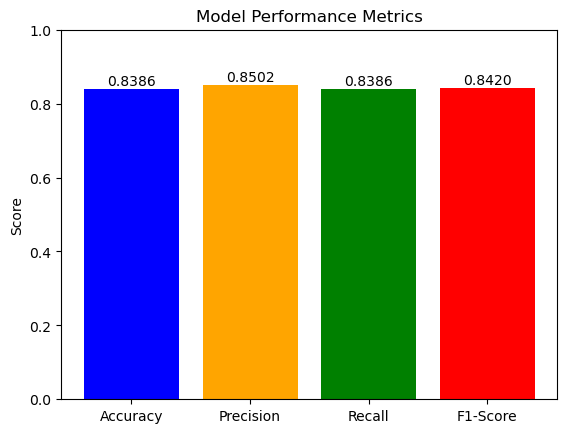

In [30]:
# Plot to evaluate performance
plt.bar(metrics, values3, color=["blue", "orange", "green", "red"])
for i, value in enumerate(values3):
    plt.text(i, value + 0.01, f"{value:.4f}", ha="center")
plt.title("Model Performance Metrics")
plt.ylabel("Score")
plt.ylim(0, 1)  
plt.show()

### 6. Hyperparameter tuning using gridsearch for XGBoost

In [31]:
# Define the hyperparameter grid for XGBoost
xgb_param_grid = {
    'classifier__n_estimators': [100, 200, 300],
    'classifier__max_depth': [3, 6, 10],
    'classifier__learning_rate': [0.01, 0.1, 0.2],
    'classifier__subsample': [0.8, 1.0]
}

In [32]:
# Use GridSearchCV to find the best hyperparameters
xgb_grid_search = GridSearchCV(pipeline3, xgb_param_grid, cv=5, n_jobs=-1, verbose=1)

In [33]:
# Fit GridSearch to the data
xgb_grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 54 candidates, totalling 270 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('cat',
                                                                         OneHotEncoder(),
                                                                         ['Gender',
                                                                          'Company',
                                                                          'Transmission',
                                                                          'Color',
                                                                          'Dealer_Region']),
                                                                        ('num',
                                                                         StandardScaler(),
                                                                         ['Annual_Income',
                                                                          'Price_($)'])])),
                                       ('classifier',
                                        XGBClassifier(base_score=None,
                                                      booster=None,
                                                      callbacks=None,
                                                      colsample_bylevel=None,
                                                      colsample_bynode=None...
                                                      min_child_weight=None,
                                                      missing=nan,
                                                      monotone_constraints=None,
                                                      multi_strategy=None,
                                                      n_estimators=None,
                                                      n_jobs=None,
                                                      num_parallel_tree=None,
                                                      objective='multi:softprob', ...))]),
             n_jobs=-1,
             param_grid={'classifier__learning_rate': [0.01, 0.1, 0.2],
                         'classifier__max_depth': [3, 6, 10],
                         'classifier__n_estimators': [100, 200, 300],
                         'classifier__subsample': [0.8, 1.0]},
             verbose=1)

### 7. Evaluate final model

In [34]:
# Predictions
y_pred = xgb_grid_search.predict(X_test)

# Store Metrics
report_dict4 = classification_report(y_test, y_pred, output_dict=True)
accuracy4 = accuracy_score(y_test, y_pred)

# Extract metrics for the bar chart
metrics = ["Accuracy", "Precision", "Recall", "F1-Score"]
values4 = [
    accuracy4,                           # Accuracy
    report_dict4['weighted avg']['precision'],  # weighted avg Precision
    report_dict4['weighted avg']['recall'],     # weighted avg Recall
    report_dict4['weighted avg']['f1-score']    # weighted avg F1-Score
]

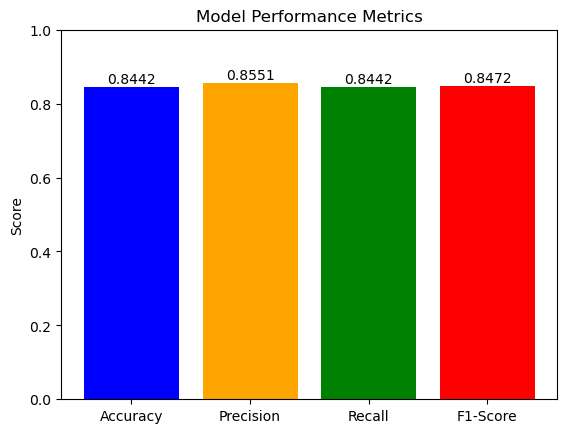

In [35]:
# Plot to evaluate performance
plt.bar(metrics, values4, color=["blue", "orange", "green", "red"])
for i, value in enumerate(values4):
    plt.text(i, value + 0.01, f"{value:.4f}", ha="center")
plt.title("Model Performance Metrics")
plt.ylabel("Score")
plt.ylim(0, 1)  
plt.show()

# 8. Metrics Walk

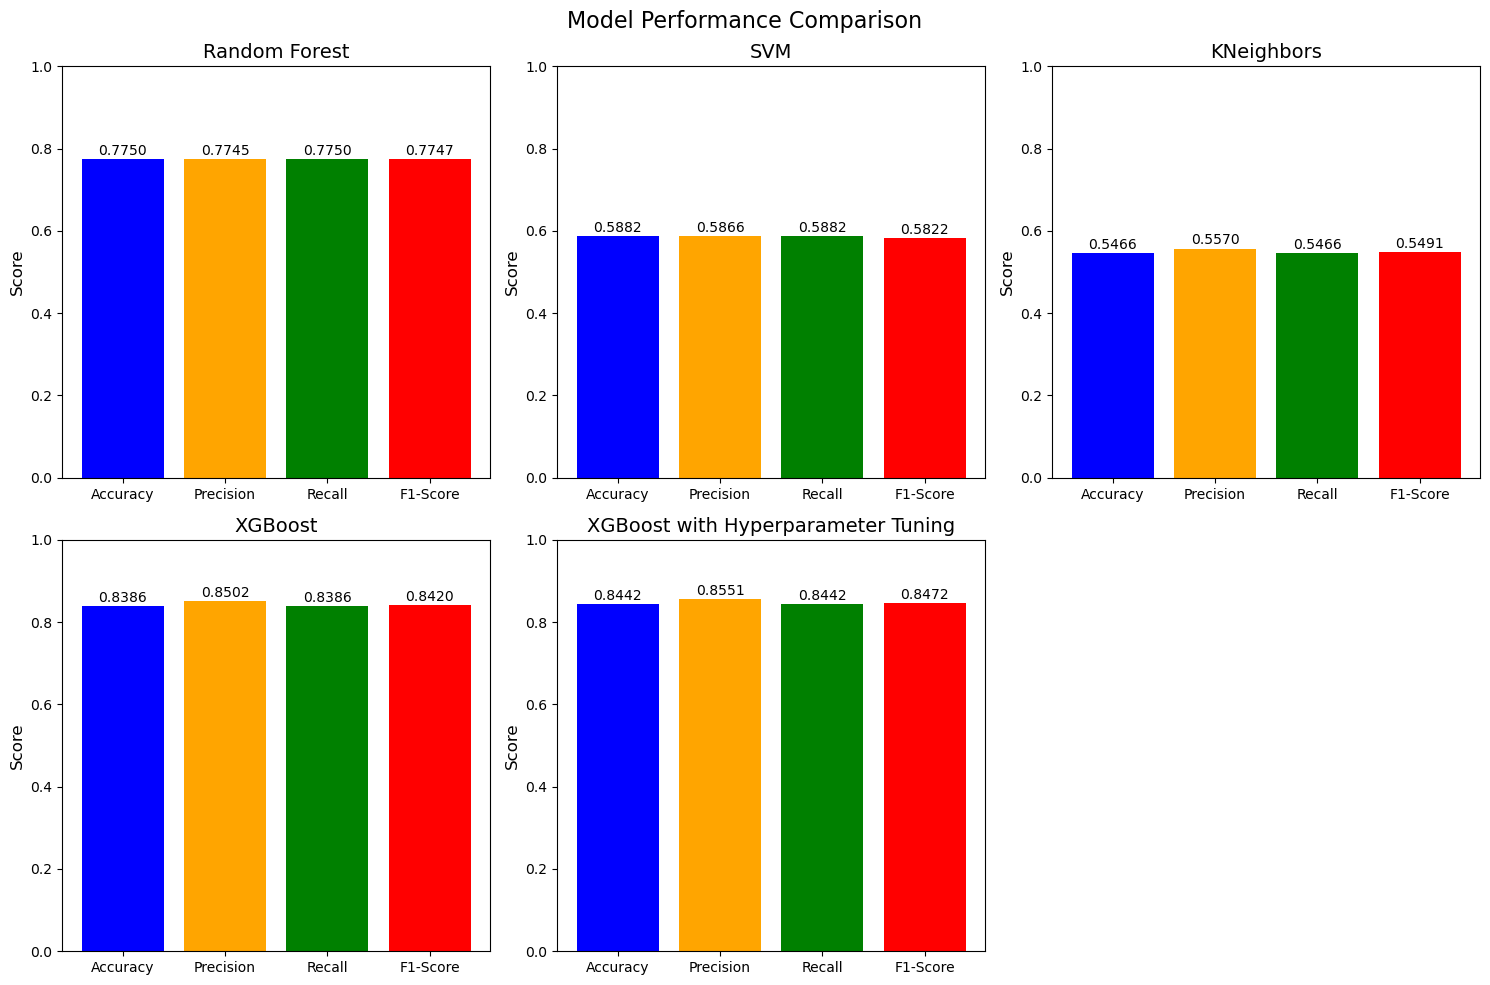

In [36]:
values_list = [values0, values1, values2, values3, values4]
models_list = ['Random Forest', 'SVM', 'KNeighbors', 'XGBoost', 'XGBoost with Hyperparameter Tuning']

# Set up the grid
fig, axes = plt.subplots(2, 3, figsize=(15, 10))  # 2 rows, 3 columns
axes = axes.flatten()  # Flatten the grid to access axes easily

# Plot each graph
for i, values in enumerate(values_list):
    ax = axes[i]
    ax.bar(metrics, values, color=["blue", "orange", "green", "red"])
    for j, value in enumerate(values):
        ax.text(j, value + 0.01, f"{value:.4f}", ha="center", fontsize=10)
    ax.set_title(models_list[i], fontsize=14)
    ax.set_ylim(0, 1)
    ax.set_ylabel("Score", fontsize=12)

# Hide the unused subplot
for ax in axes[len(values_list):]:
    ax.axis("off")

# Add title for the entire grid
fig.suptitle('Model Performance Comparison', fontsize=16)

# Adjust layout
plt.tight_layout()
plt.show()

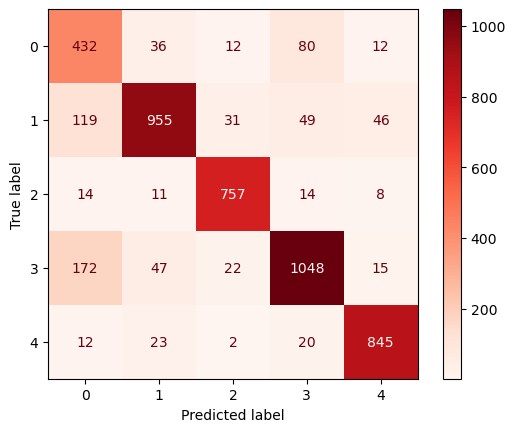

In [37]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred, labels=xgb_grid_search.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=xgb_grid_search.classes_)
disp.plot(cmap=plt.cm.Reds)
plt.show()

## Next Steps

- Add validation split as well (75% training, 10% validation, 15% testing)
- Add ROC/AUC curves & Metrics progression chart (Bar char of bar charts)